# BibRec: Training Random Forest Model

### Train Random Forest Model on all ratings
RF Features: Country, State, Age, Year-of-Publication, Publisher


In [1]:
# Specify where to save the model
model_file = "rf-model-ex6.pkl"

In [2]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='../data/normalized_books.csv',
                                            users_path='../data/normalized_users.csv',
                                            ratings_path='../data/normalized_ratings.csv')


books = books.drop(["isbn"], axis=1)
ratings = ratings.drop(["isbn"], axis=1)

In [3]:
users

,Unnamed: 0,user_id,age,city,state,country,user_mean,user_count
0,0,1,29.211585,nyc,new_york,usa,0.0,0.0
1,1,2,18.000000,stockton,california,usa,0.0,0.0
2,2,3,29.482966,moscow,other,other,0.0,0.0
3,3,4,17.000000,porto,other,portugal,0.0,0.0
4,4,5,61.303176,farnborough,other,united_kingdom,0.0,0.0
...,...,...,...,...,...,...,...,...
278853,278853,278854,24.011737,portland,oregon,usa,7.0,6.0
278854,278854,278855,50.000000,tacoma,washington,united_kingdom,0.0,0.0
278855,278855,278856,46.690675,brampton,ontario,canada,0.0,0.0
278856,278856,278857,59.526554,knoxville,other,usa,0.0,0.0


In [4]:
books

,Unnamed: 0,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,0,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,3
1,1,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,4
2,2,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,14
3,3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,6
4,4,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
270939,270939,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,270940,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,1
270942,270942,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,9


In [5]:
ratings

,Unnamed: 0,isbn13,normalized_rating,user_id,book_rating
0,0,9780155061224,0.0,276726,5
1,1,9780521656153,-1.5,276729,3
2,2,9780521795029,1.5,276729,6
3,3,9780385501200,0.0,276744,7
4,4,9780385501200,0.0,11676,10
...,...,...,...,...,...
9444717,9444717,9780515107661,0.0,242006,10
9444718,9444718,9780515107661,0.0,249628,10
9444719,9444719,9780515107661,0.0,276709,10
9444720,9444720,9780590442442,0.0,197659,8


In [6]:
# limit data to top-rated books only
top_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
top_ratings = top_ratings[:50]
top_ratings = top_ratings.reset_index()
# user_id => nr of ratings
top_ratings = top_ratings.drop('user_id', axis=1)
top_ratings

/tmp/ipykernel_39447/1946061310.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_ratings = top_ratings[:50]


,isbn13
0,9780316666343
1,9780971880108
2,9780385504201
3,9780312195519
4,9780060928339
5,9780590353427
6,9780142001745
7,978044667227
8,9780440237228
9,9780452282155


In [7]:
top_ratings = top_ratings.merge(ratings, on='isbn13', how='inner')
top_ratings

,isbn13,Unnamed: 0,normalized_rating,user_id,book_rating
0,9780316666343,12796,1.000000,277439,7
1,9780316666343,12797,1.000000,277752,7
2,9780316666343,12798,1.000000,278633,9
3,9780316666343,12799,1.000000,638,10
4,9780316666343,12800,1.000000,709,3
...,...,...,...,...,...
3425283,9780316776967,9244582,-0.957198,262940,9
3425284,9780316776967,9244583,-0.957198,264321,6
3425285,9780316776967,9244584,-0.957198,266588,7
3425286,9780316776967,9244585,-0.957198,268622,7


In [8]:
encoded_books = hot_encode_books(books)
encoded_books

hot encoding books


,Unnamed: 0,book_title,book_author,year_of_publication,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,...,publisher_random_house_inc,publisher_scholastic,publisher_signet_book,publisher_silhouette,publisher_simon_&amp;_schuster,publisher_st._martin's_press,publisher_st_martins_pr,publisher_tor_books,publisher_warner_books,publisher_zebra_books
0,0,Classical Mythology,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,7.666667,9.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Decision in Normandy,Carlo D'Este,1991,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,7.500000,2.0,...,0,0,0,0,0,0,0,0,0,0
3,3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,7.833333,6.0,...,0,0,0,0,0,0,0,0,0,0
4,4,The Mummies of Urumchi,E. J. W. Barber,1999,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,270939,There's a Bat in Bunk Five,Paula Danziger,1988,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
270940,270940,From One to One Hundred,Teri Sloat,1991,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
270941,270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
270942,270942,Republic (World's Classics),Plato,1996,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
encoded_users = hot_encode_users(users)
encoded_users

,Unnamed: 0,user_id,age,city,user_mean,user_count,country_argentina,country_australia,country_austria,country_brazil,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,0,1,29.211585,nyc,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,18.000000,stockton,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,29.482966,moscow,0.0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,4,17.000000,porto,0.0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,5,61.303176,farnborough,0.0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278853,278854,24.011737,portland,7.0,6.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
278854,278854,278855,50.000000,tacoma,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278855,278855,278856,46.690675,brampton,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
278856,278856,278857,59.526554,knoxville,0.0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,publisher_harpercollins_publishers,publisher_other,...,publisher_random_house_inc,publisher_scholastic,publisher_signet_book,publisher_silhouette,publisher_simon_&amp;_schuster,publisher_st._martin's_press,publisher_st_martins_pr,publisher_tor_books,publisher_warner_books,publisher_zebra_books
0,9780195153446,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,9780002005012,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9780060973124,14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9780374157067,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9780393045215,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,978044040095,17,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270940,978052544763,14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270941,9780060086671,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270942,9780192126047,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_argentina,country_australia,country_austria,country_brazil,country_canada,country_china,country_france,country_germany,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,1,29.211585,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,29.482966,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,17.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,61.303176,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,24.011737,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
278854,278855,50.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278855,278856,46.690675,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
278856,278857,59.526554,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# TODO: normalized_rating doesn't make sense yet
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df_ratings = top_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,isbn13,user_id,book_rating
0,9780316666343,277439,7
1,9780316666343,277752,7
2,9780316666343,278633,9
3,9780316666343,638,10
4,9780316666343,709,3
...,...,...,...
3425283,9780316776967,262940,9
3425284,9780316776967,264321,6
3425285,9780316776967,266588,7
3425286,9780316776967,268622,7


In [13]:
df = df_ratings
df = df.merge(df_books, on="isbn13", how="left")
df = df.merge(df_users, on="user_id", how="left")
df

,isbn13,user_id,book_rating,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,9780316666343,277439,7,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,9780316666343,277752,7,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,9780316666343,278633,9,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,9780316666343,638,10,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,709,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425283,9780316776967,262940,9,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3425284,9780316776967,264321,6,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3425285,9780316776967,266588,7,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3425286,9780316776967,268622,7,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
# Features
# X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
X = df.drop(['user_id', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']

In [15]:
X

,isbn13,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,publisher_harpercollins_publishers,publisher_other,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,9780316666343,3,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,9780316666343,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,9780316666343,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,9780316666343,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9780316666343,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425283,9780316776967,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3425284,9780316776967,4,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3425285,9780316776967,4,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3425286,9780316776967,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [16]:
Y

0           7
1           7
2           9
3          10
4           3
           ..
3425283     9
3425284     6
3425285     7
3425286     7
3425287     7
Name: book_rating, Length: 3425288, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [18]:
from os.path import exists
import pickle

if exists(model_file):
    print("Loading file:", model_file)
    with open(model_file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model:", model_file)
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, verbose=10)

Loading file: rf-model-ex6.pkl


In [19]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    7.6s


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   21.1s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   33.4s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100


[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:   47.7s


building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.1min


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.4min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.9min


building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100


[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:  2.3min


building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100


[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  2.8min


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100


[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:  3.5min


building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100


[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:  4.0min


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  4.3min finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       verbose=10)

In [20]:
import pickle

# Save the model to a file
with open(model_file, "wb") as file:
    pickle.dump(rfc, file)

In [21]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    4.8s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.9s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    7.6s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    9.3s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   11.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   12.8s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   13.7s finished


array([ 8,  8, 10, ...,  8, 10,  9])

In [22]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.90      0.86      0.88     15044
           2       0.81      0.82      0.81     18796
           3       0.90      0.86      0.88     24639
           4       0.90      0.88      0.89     23138
           5       0.89      0.89      0.89     73675
           6       0.88      0.87      0.87     67647
           7       0.88      0.88      0.88    150893
           8       0.90      0.90      0.90    241796
           9       0.88      0.88      0.88    199994
          10       0.88      0.90      0.89    211965

    accuracy                           0.89   1027587
   macro avg       0.88      0.87      0.88   1027587
weighted avg       0.89      0.89      0.89   1027587

88.6381396417043


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    4.1s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    6.2s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    8.0s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    9.6s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   11.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   11.8s finished


Confusion matrix, without normalization
[[ 12934    519    528      0    359    184      0    367      0    153]
 [   535  15441    186    427    237    370    386    778    255    181]
 [   334    555  21216    172    179    371    883    438    213    278]
 [   179    172    182  20295    228    249    355    822    510    146]
 [   178    739    651    192  65893    746   1012    967   1843   1454]
 [   158    339      0    630    466  58672   1325   2222   1597   2238]
 [     0    557    434    118    929   1487 132252   4483   5824   4809]
 [     0    198     76    513   1789   1110   5623 216969   7451   8067]
 [     0    217    384     69   1515   2118   5393   6842 175578   7878]
 [     0    375      0    153   2066   1395   3176   6116   7100 191584]]


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    4.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    6.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    7.5s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    8.9s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   10.3s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   11.2s finished


Normalized confusion matrix
[[8.60e-01 3.45e-02 3.51e-02 0.00e+00 2.39e-02 1.22e-02 0.00e+00 2.44e-02
  0.00e+00 1.02e-02]
 [2.85e-02 8.22e-01 9.90e-03 2.27e-02 1.26e-02 1.97e-02 2.05e-02 4.14e-02
  1.36e-02 9.63e-03]
 [1.36e-02 2.25e-02 8.61e-01 6.98e-03 7.26e-03 1.51e-02 3.58e-02 1.78e-02
  8.64e-03 1.13e-02]
 [7.74e-03 7.43e-03 7.87e-03 8.77e-01 9.85e-03 1.08e-02 1.53e-02 3.55e-02
  2.20e-02 6.31e-03]
 [2.42e-03 1.00e-02 8.84e-03 2.61e-03 8.94e-01 1.01e-02 1.37e-02 1.31e-02
  2.50e-02 1.97e-02]
 [2.34e-03 5.01e-03 0.00e+00 9.31e-03 6.89e-03 8.67e-01 1.96e-02 3.28e-02
  2.36e-02 3.31e-02]
 [0.00e+00 3.69e-03 2.88e-03 7.82e-04 6.16e-03 9.85e-03 8.76e-01 2.97e-02
  3.86e-02 3.19e-02]
 [0.00e+00 8.19e-04 3.14e-04 2.12e-03 7.40e-03 4.59e-03 2.33e-02 8.97e-01
  3.08e-02 3.34e-02]
 [0.00e+00 1.09e-03 1.92e-03 3.45e-04 7.58e-03 1.06e-02 2.70e-02 3.42e-02
  8.78e-01 3.94e-02]
 [0.00e+00 1.77e-03 0.00e+00 7.22e-04 9.75e-03 6.58e-03 1.50e-02 2.89e-02
  3.35e-02 9.04e-01]]


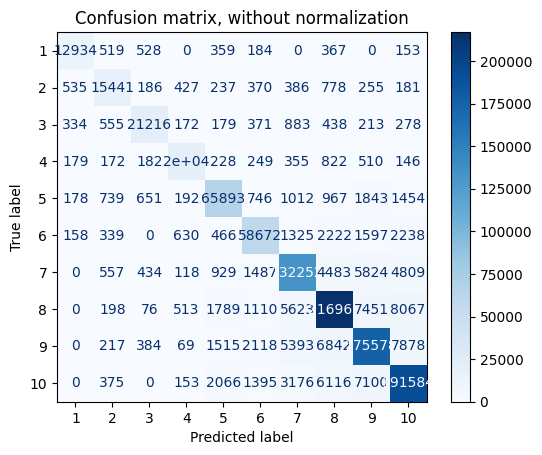

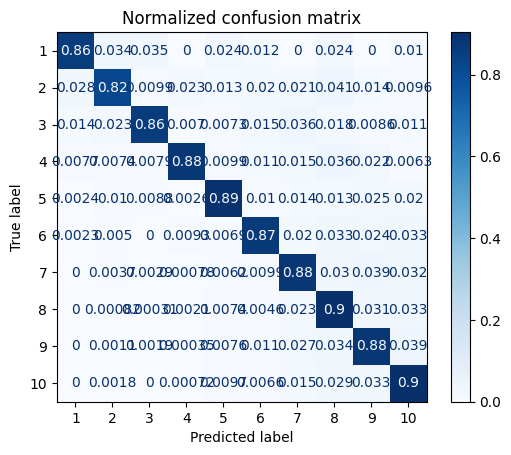

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [24]:
rfc.score(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    2.7s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    5.7s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    7.6s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   10.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   12.4s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:   15.2s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   18.1s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   22.6s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   27.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   29.1s finished


0.8910789960883363

In [25]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.715346
1,normalized_year_of_publication,0.089615
0,isbn13,0.078899
59,state_other,0.011140
46,state_california,0.005912
...,...,...
4,publisher_berkley_publishing_group,0.000000
5,publisher_fawcett_books,0.000000
6,publisher_harlequin,0.000000
7,publisher_harpercollins,0.000000


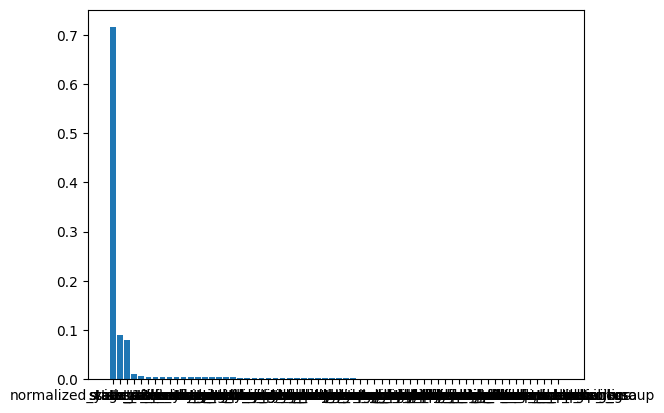

In [26]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [27]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
44,country_usa,0.004110
37,country_other,0.003841
28,country_canada,0.002538
31,country_germany,0.002341
43,country_united_kingdom,0.002174
34,country_malaysia,0.002116
25,country_australia,0.001981
38,country_portugal,0.001790
35,country_netherlands,0.001491
40,country_spain,0.001440


In [28]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
59,state_other,0.011140
46,state_california,0.005912
49,state_illinois,0.004885
60,state_pennsylvania,0.004515
50,state_massachusetts,0.004298
51,state_michigan,0.004189
53,state_new_york,0.004176
63,state_washington,0.004054
58,state_oregon,0.003889
61,state_texas,0.003731


In [29]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
9,publisher_other,0.003116
14,publisher_scholastic,0.002131
2,publisher_ballantine_books,0.001466
21,publisher_warner_books,0.001393
10,publisher_penguin_books,0.001379
18,publisher_st._martin's_press,0.000935
12,publisher_pocket,0.000778
20,publisher_tor_books,0.000000
15,publisher_signet_book,0.000000
16,publisher_silhouette,0.000000


In [30]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.715346
Name: Importances, dtype: float64
country_importance: 0.03180616841453015
state_importance: 0.07313707047233294
publisher_importance: 0.011196173766033468
